# Social Representations and Boundaries of Humor: A focus on Gender roles

## The plan for this notebook

Here is a first tentative of a structure, ideas and methodology on how to analyse gender roles and representation in the New Yorker caption contest. Remember, the idea here is to start simple and then add complexity little by little.

0) Start with some basics plots and analysis:

    - When is the first mention of each gender ? 

    - How often men/women appear in the cartoon ? 

        a. To recognize if a man/woman is in the picture, the idea is to use the *image_descriptions* and *uncanny_image_descriptions* that are contained in the metadata. **For the cartoons after contest 763 we don't have this metadata**, this is a problem for later where I'll need to find a way to add a description to the images that don't have one. Or find an model that detect men/women in a cartoon.

        b. When this is done, I can do several plots. The first being a bar plot with just the distribution of gender over all the cartoons. Then I can plot the evolution of the gender distribution over time, to see if it is constant or not. 

        Maybe there is a need for normalisation somewhere to allow comparision ?

    - How often men/women are mentionned in the captions ?

        I think this is interesting to link this with part 0.a. Are men more mentionned when there is a man in the picture or not, same for women ? Are men mentionned in the caption even if there are no men in the picture, same for women ? Does the humor around one gender depends on referencing the other ? (Add a simple “co-occurrence” heatmap → e.g., men in image × women in caption, women in image × men in caption.)

        **Remark:** Since there are a lot of caption for each contest, to simplify this basic analysis, I'll look only in the top ten most voted captions.
        
        c. To do this, I can just find the mention of man/women in the captions. How ? For now, I haven't thought about it, I think we need a kind of list or something that can find word that are gender related maybe ?

        d. Same as 0.b, do some plots of the overall contest and then evolution over the years.

    - Gender-neutral cases: Track “no gender mention/no gender in image” as a category — this helps show if humor is becoming more or less gendered over time.

    - Timeline of first appearances: When did women start appearing more often? Is there a visible change after 2010 or so?


1) Dig in a little deeper: How are men vs women depicted

    - Caption Analysis Word Clouds (Andras did that a bit already, try to reuse)
        Here the idea is to find gendered terms (e.g., “wife,” “husband,” “boss,” “nurse”) and their cooccurrences, to see if ... ?

    - Role Distribution Sankey Diagram: Flow from gender → depicted roles (domestic, professional, heroic, villainous). 

    - Do captions reinforce stereotypes and does the audience reward or punishes them ?

    **Suggestions from chat**: 

    - Build a small gendered lexicon manually first (e.g., “wife, husband, mom, dad, boss, nurse, secretary, CEO”). Then count frequencies of those words. Later, you could extend it using a prebuilt list (like LIWC or GenderedWords from textdescriptives).

    - Simple role classification: You don’t need machine learning yet — just group words into themes:

        1. Domestic (kitchen, home, dinner)

        2. Workplace (office, boss, meeting)

        3. Heroic/Action (police, firefighter, soldier)

    Then make a Sankey plot linking gender → role.

    - Caption polarity:

    Use sentiment analysis (e.g., TextBlob or VADER) to see if captions mentioning men vs women differ in sentiment. This is very simple to compute and could hint at bias (“are jokes about men more negative?”).

    - Audience response: If you have access to which captions won or were finalists, compare the proportion of gender-related captions among winners vs non-winners. This ties into the “does the audience reward stereotypes?” question.

2) Coming soon...

📊 Step 2 — Expanding later

Keep your “coming soon” section! Some easy next steps later could be:

Word embeddings to see what words cluster around “man” vs “woman.”

Topic modeling filtered by gender mentions.

Temporal word shift (how associations change over years).

## Initialisation of the absolute Github repository path

In [2]:
from pathlib import Path
import sys

root = Path(__file__).resolve().parent if "__file__" in globals() else Path.cwd()
while root.parent != root:
    if ((root / ".git").exists() and 
        (root / "README.txt").exists() and 
        (root / "results.ipynb").exists()): break
    root = root.parent
if str(root) not in sys.path: sys.path.insert(0, str(root))

print("Root folder at: ", root)

Root folder at:  d:\GitHub\ada-2025-project-adacore42


## Imports

In [110]:
# utils
from src.utils.general_utils import *

# paths
from src.utils.paths import *

# working librairies
import os
import pickle

# basics
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# text processing libraries
import re

## Loading of the preprocessed data pickle files

Use this when the data is stored in the right place.

In [7]:
# stored_dataprep_pkl_path = root / STORED_DATAPREP_PKL_PATH

# # Chargement du fichier pickle
# with open(stored_dataprep_pkl_path, "rb") as f:
#     data = pickle.load(f)

# # Extraction des objets stockés dans le pickle

# # dataA est une liste de DataFrames pandas (ou un objet similaire, comme un dictionnaire de DataFrames). Chaque élément de la liste contient un DataFrame avec 7 colonnes et un nombre variable de lignes.
# dataA = data['dataA']
# # dataC est un DataFrame de métadonnées de tous les cartoon contests.
# dataC = data['dataC']
# dataA_startID = data['dataA_startID']
# dataA_endID = data['dataA_endID']
# dataC_lastGoodID = data['dataC_lastGoodID']


Loading the data from Andras.

In [10]:
stored_dataprep_pkl_path = r'D:\EPFL\MA3\Applied Data Analysis\Project\cleaned_data_prepared 1.pkl'

with open(stored_dataprep_pkl_path, 'rb') as f:
    data = pickle.load(f)

In [12]:
# Extract the objects in the pickle

# dataA est une liste de DataFrames pandas (ou un objet similaire, comme un dictionnaire de DataFrames). Chaque élément de la liste contient un DataFrame avec 7 colonnes et un nombre variable de lignes.
dataA = data['dataA']
# dataC est un DataFrame de métadonnées de tous les cartoon contests.
dataC = data['dataC']
dataA_startID = data['dataA_startID']
dataA_endID = data['dataA_endID']
dataC_lastGoodID = data['dataC_lastGoodID']

In [14]:
dataA[42].head()

,caption,mean,precision,votes,not_funny,somewhat_funny,funny,cleaned_caption
rank,,,,,,,,
0,You were with Ringling Brothers? I was with Le...,1.982092,0.010177,6645,2347,2070,2228,ringing brother german brother
1,"Well, it suits you better than the president c...",1.931655,0.039002,556,255,84,217,well suit better president costume
2,"Sure, it's all fun and games. Until one of you...",1.916803,0.014894,3053,1171,965,917,sure fun game one get elected
3,"Hey, all I know is that they left in a very sm...",1.908179,0.017256,1993,691,794,508,hey know left small car
4,"Would you like that straight up, on the rocks,...",1.905750,0.014900,2939,1110,996,833,would like straight rock sprayed directly face


In [15]:
dataC.head()

,num_captions,num_votes,image_locations,image_descriptions,image_uncanny_descriptions,entities,questions,date,cleaned_image_locations,cleaned_questions,cleaned_image_uncanny_descriptions,cleaned_image_descriptions
0,3905.0,41185.0,[the street],[A man is relaxing on a city street. Others ar...,[A man is just laying in the middle of the sid...,[https://en.wikipedia.org/wiki/Bystander_effec...,[Why is he laying there?],NaT,street,laying,man laying middle sidewalk,man relaxing city street others going business...
1,3325.0,28205.0,"[the front hard, a residential walkway]",[A man in a winter coat and cap is looking at ...,[It's unusual to see someone holding a snow sh...,"[https://en.wikipedia.org/wiki/Snowball_fight,...",[Is the man overly small or the shovel overly ...,NaT,front hard residential halfway,man overlay small shovel overlay big boy huge ...,unusual see someone holding snow shovel way ma...,man winter coat cap looking small bearded man ...
2,4399.0,21574.0,"[yoga place, a yoga studio]",[A man and woman are standing facing one anoth...,[Nothing is really out of place in this image....,"[https://en.wikipedia.org/wiki/Rug, https://en...","[Why is the man carrying a huge rug?, Why is t...",2016-03-21,place studio,man carrying huge rug man trying use living ro...,nothing really place image man huge rug big st...,man woman standing facing one another mirror i...
3,4141.0,16894.0,"[a workplace, an elevator]",[Three business men are walking down a hall. T...,[A suit case is usually carried by one person ...,[https://en.wikipedia.org/wiki/Worker_cooperat...,[Why is the briefcase big enough for three peo...,2016-03-27,workplace elevator,briefcase big enough three people carrying car...,suit case usually carried one person three sup...,three business men walking hall carrying brief...
4,3951.0,95790.0,[plains],[Some cowboys are riding through the desert. T...,[There are rocking horses in place of real hor...,"[https://en.wikipedia.org/wiki/Rocking_horse, ...",[Why is this chase taking place?],2016-04-03,plain,chase taking place,rocking horse place real horse,cowboy riding desert rocking horse


## Functions

Here is all the functions used in this notebook. This will be updated with the functions I know work and are useful so that I can easily put them in a .py later.

In [ ]:
# Functions used in part 0

## 0. Basic plots and analysis

First I need a systematic way to detect gender mention in a sentence. 

### Basic approach

Let's start with simple keyword matching to have a first grasp of what's happening. I defined two simple lists with basic gendered word and then created a function that detects if one of the word is used in a sentence. 

- For the images, I'll use the cleaned image descriptions
- For the captions, I'll use the top 10 cleaned captions

In [ ]:
# gendered word lists
male_terms = ["man", "men", "guy", "boy", "husband", "dad", "father", "him", "he", "his"]
female_terms = ["woman", "women", "girl", "wife", "mom", "mother", "her", "she", "hers"]

# function to detect if there is a mention of gender
def detect_gender(text):
    
    #text = text.lower() <- the text is already cleaned, don't need that
    male = any(re.search(rf"\b{word}\b", text) for word in male_terms)
    female = any(re.search(rf"\b{word}\b", text) for word in female_terms)
    if male and female:
        return "both"
    elif male:
        return "male"
    elif female:
        return "female"
    else:
        return "neutral"

In [61]:
# Let's look at the images
dataC0 = dataC.copy(deep=True)

dataC0['gender_mention'] = dataC0['cleaned_image_descriptions'].apply(detect_gender)

# !! Since we don't have the metadata after contest 763, I need to do some slicing
last_idx = 251
dataC01 = dataC0[dataC0.index <= last_idx].copy(deep=True)

# check
dataC01.tail()

,num_captions,num_votes,image_locations,image_descriptions,image_uncanny_descriptions,entities,questions,date,cleaned_image_locations,cleaned_questions,cleaned_image_uncanny_descriptions,cleaned_image_descriptions,gender_mention
247,9411.0,779033.0,"[the ocean, the sea]",[Two fish are in the ocean and they seem to be...,[One of the fish that is mounted on the wall l...,[https://en.wikipedia.org/wiki/Big_Mouth_Billy...,[How is the mounted fish still alive and able ...,2021-06-28,ocean sea,mounted fish still alive able swim fish alive ...,one fish mounted wall like trophy still alive ...,two fish ocean seem discussion one fish normal...,neutral
248,7393.0,807956.0,[a restaurant],[Two identical waiters approach a couple sitti...,[A waiter is carrying a garbage can to a table...,"[https://en.wikipedia.org/wiki/Waiting_staff, ...",[Why is the waiter bringing the couple garbage...,2021-07-05,restaurant,waiter bringing couple garage waiter bringing ...,waiter carrying garage table restaurant water ...,two identical water approach couple sitting on...,male
249,10712.0,926127.0,[a field],[Death is giving some food to a man. He is say...,[Death doesn't usually give things to people.],[https://en.wikipedia.org/wiki/Death_(personif...,[Are they neighbors?],2021-07-19,field,neighbor,death usually give thing people,death giving food man saying something woman side,both
250,7076.0,901611.0,"[experimental facility, hamster cage]",[A mouse is conducting a hamster wheel experim...,[The rat is holding a clipboard and standing u...,"[https://en.wikipedia.org/wiki/Mouse, https://...","[Why is the mouse conducting the experiment?, ...",2021-07-26,experimental facility master cage,mouse conducting experiment saying turtle turt...,rat holding cupboard standing upright mouse co...,mouse conducting master wheel experiment mouse...,neutral
251,9007.0,889556.0,"[a gas station, gas station]",[There is a huge hot dog mobile outside a buil...,"[A hot dog car is outside, which is weird., Th...","[https://en.wikipedia.org/wiki/Customer, https...","[Why is the hot dog car colored in?, Why is th...",2021-08-02,gas station gas station,hot dog car colored huge hot dog mobile employ...,hot dog car outside weird vehicle station unus...,huge hot dog mobile outside building man talki...,male


In [62]:
# Let's look at the top ten captions
dataTop10 = []

count = []

# !! Since we don't have the metadata after contest 763 we don't need to do this for all of our data

for contest in dataA[:last_idx+1]:

    # Keep only the top 10
    df_top10 = contest[contest.index < 10].copy(deep = True)

    # for each of them apply the function to detect gender
    df_top10['gender_mention'] = df_top10['cleaned_caption'].apply(detect_gender)

    dataTop10.append(df_top10)

    # Count mentions per contest
    gender_counts = (
        df_top10["gender_mention"]
        .value_counts()
        #.unstack(fill_value=0)
        .reset_index()
    )

    count.append(gender_counts)

#dataTop10[0]

In [26]:
#dataC0.head()

# the function seems to be working with those basic word, sometimes there are captions that contains gendered word that we of course miss
# but it's a good start.

Now that I have this, I can do some plots.

### How often men/women appear in a cartoon ?

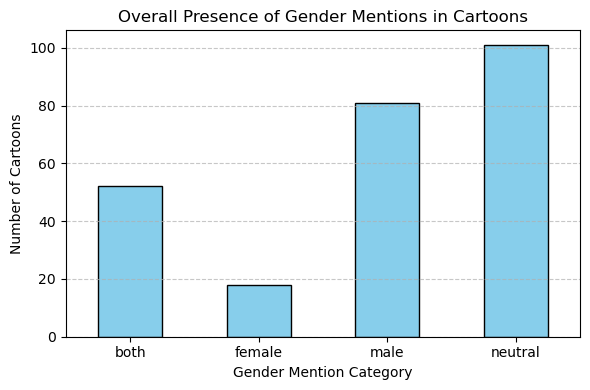

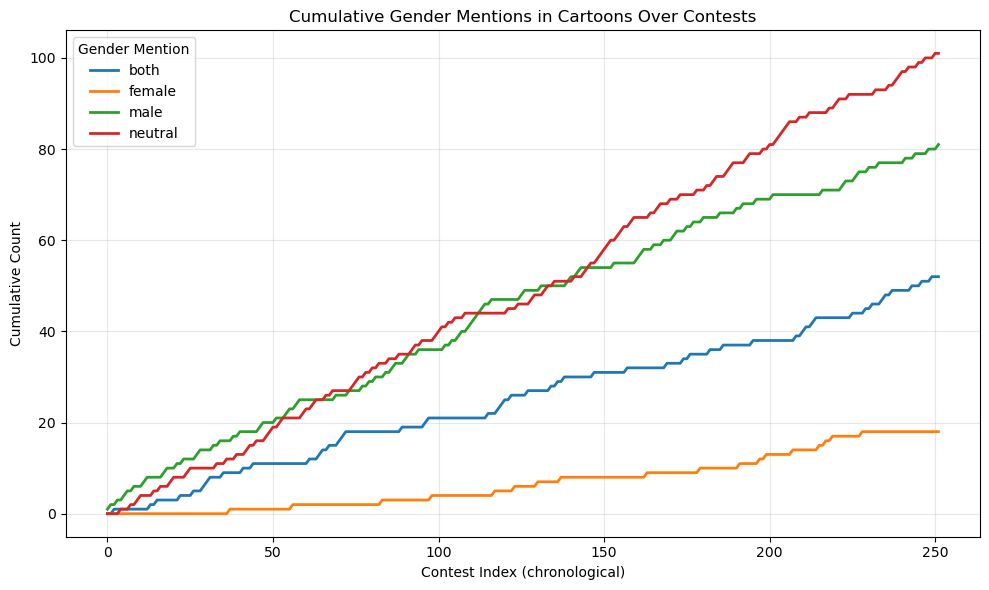

In [72]:
# How often men/women appear in a cartoon ?

# Overall distribution of gender over all the cartoons.
gender_image = dataC01['gender_mention']

# Count frequency
gender_counts = gender_image.value_counts().sort_index()

# Plot
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Overall Presence of Gender Mentions in Cartoons")
plt.xlabel("Gender Mention Category")
plt.ylabel("Number of Cartoons")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evolution over time
df = pd.DataFrame({"contest_index": range(0, len(dataC01)),
                   "gender_mention": dataC01['gender_mention']})

# Count mentions per contest (here each row = one contest)
counts = pd.get_dummies(df["gender_mention"]).cumsum()

# Compute cumulative counts
cumulative = counts.cumsum()

# Plot cumulative counts
plt.figure(figsize=(10, 6))
for col in counts.columns:
    plt.plot(df["contest_index"], counts[col], label=col, linewidth=2)

plt.title("Cumulative Gender Mentions in Cartoons Over Contests")
plt.xlabel("Contest Index (chronological)")
plt.ylabel("Cumulative Count")
plt.legend(title="Gender Mention")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### How often men/women appear in the top 10 captions ?

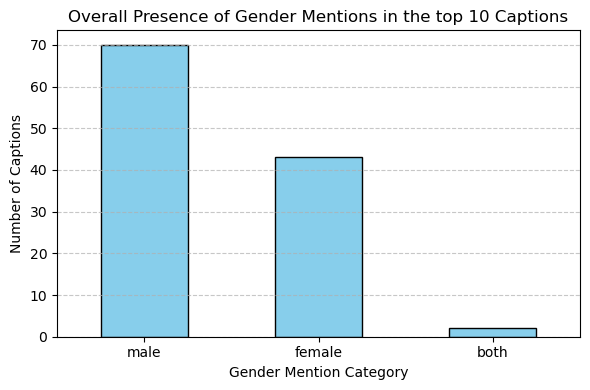

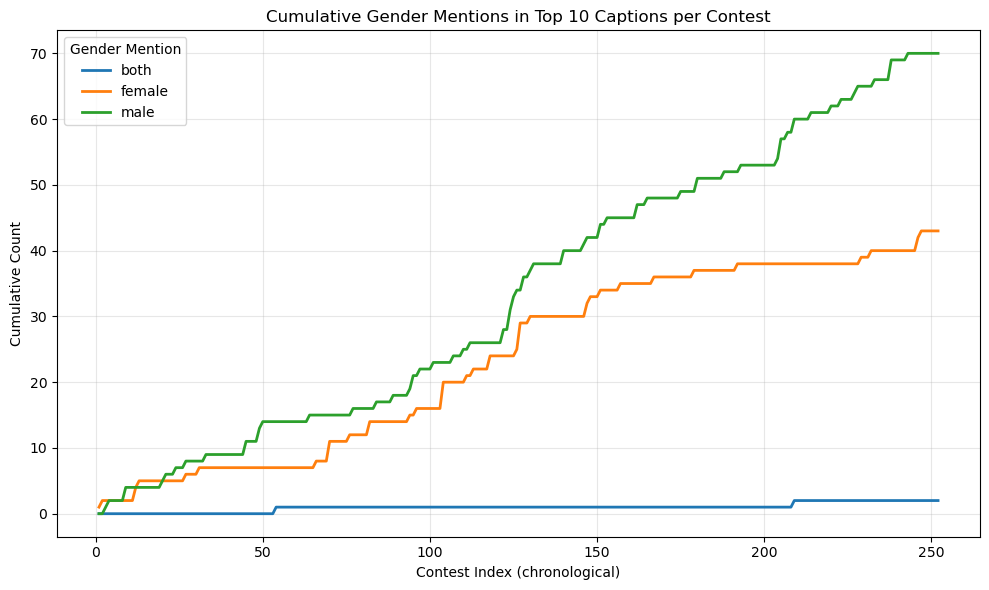

In [89]:
# How often men/women are mentionned in captions
# Overall distribution of gender over all the top 10 captions.

# Combine all contests
combined = []
for i, df in enumerate(count):
    temp = df.copy()
    temp["contest_index"] = i + 1  # add contest number
    combined.append(temp)

all_count = pd.concat(combined, ignore_index=True)
pivoted = (
    all_count.pivot(index="contest_index", columns="gender_mention", values="count")
    .fillna(0)
    .sort_index()
)

overall_counts = (
    all_count.groupby("gender_mention")["count"]
    .sum()
    .sort_values(ascending=False)
)

# Plot
plt.figure(figsize=(6, 4))
overall_counts[["male", "female", "both"]].plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Overall Presence of Gender Mentions in the top 10 Captions")
plt.xlabel("Gender Mention Category")
plt.ylabel("Number of Captions")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Evolution over time
cumulative = pivoted.cumsum()

plt.figure(figsize=(10, 6))
# removed the neutral, because it has a really a high cumulative value.
for col in cumulative.columns[:-1]:
    plt.plot(cumulative.index, cumulative[col], label=col, linewidth=2)

plt.title("Cumulative Gender Mentions in Top 10 Captions per Contest")
plt.xlabel("Contest Index (chronological)")
plt.ylabel("Cumulative Count")
plt.legend(title="Gender Mention")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



### Heatmap

- Are men more mentionned when there is a man in the picture or not, same for women ? 
- Are men mentionned in the caption even if there are no men in the picture, same for women ? 
- Does the humor around one gender depends on referencing the other ? 

Let's look at cross-relationships between gender in the image and gender in the caption. Here we'll look at this relationship for the top voted caption.

In [112]:
list_top1_gender = []

for contest in dataA[:last_idx+1]:

    # Keep only the top 1
    df_top1 = contest[contest.index == 1].copy(deep = True)

    # for each of them apply the function to detect gender
    list_top1_gender.append(df_top1['cleaned_caption'].apply(detect_gender).values[0])
    
df_gender = pd.DataFrame({"image_gender": dataC01['gender_mention'],"caption_gender": list_top1_gender})

# Cross-tabulation: counts of each combination
cross = pd.crosstab(df_gender["image_gender"], df_gender["caption_gender"])

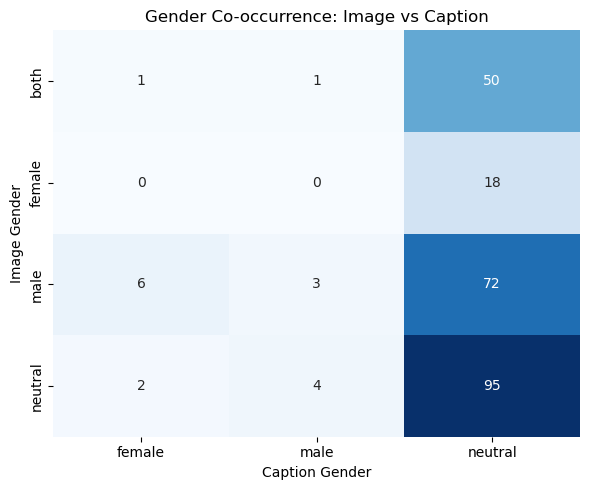

In [113]:
plt.figure(figsize=(6, 5))
sns.heatmap(
    cross,
    annot=True, fmt="d",
    cmap="Blues", cbar=False
)
plt.title("Gender Co-occurrence: Image vs Caption")
plt.xlabel("Caption Gender")
plt.ylabel("Image Gender")
plt.tight_layout()
plt.show()

### A more complex approach

Now that I've seen some basics plots with a simple method. Let's complicate things a bit by using Linguistic or Lexicon-based Tools.

### What's left to do:

- When is the first mention of each gender ? 

- Gender-neutral cases: Track “no gender mention/no gender in image” as a category — this helps show if humor is becoming more or less gendered over time.

- Timeline of first appearances: When did women start appearing more often? Is there a visible change after 2010 or so?

## 1. Dig a little deeper: How are men vs women depicted

## 2. Going further